In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
# Load the Breast Cancer dataset from sklearn
data = load_breast_cancer()

In [12]:
# The actual data is in the 'data' key, and the target labels are in the 'target' key
x = data.data  # Features (input data)
y = data.target  # Labels (target data)

# This will show the different keys available in the dataset
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
# Convert the dataset into a DataFrame for easier manipulation
df = pd.DataFrame(x, columns=data.feature_names)
df['target'] = y

# Implement PCA to reduce the dataset to 2 principal components
pca = PCA(n_components=2)  # We specify 2 components to reduce to
pca_components = pca.fit_transform(df)  # Fit the PCA model and transform the data

# Create a new DataFrame for the PCA components for easier handling
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])

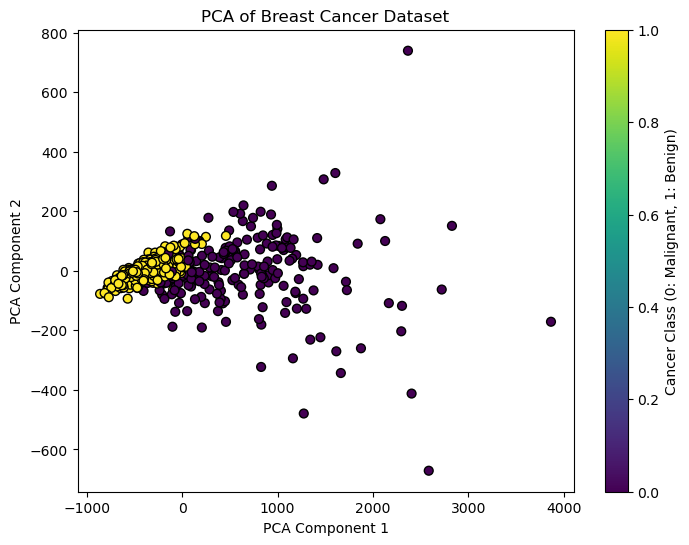

PCA visualization saved as 'pca_visualization.png'


In [6]:
# Visualize the PCA components to see how well they separate the classes
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA Component 1'], pca_df['PCA Component 2'], c=data.target, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='Cancer Class (0: Malignant, 1: Benign)')
plt.savefig('pca_visualization.png')
plt.show()

print("PCA visualization saved as 'pca_visualization.png'")

In [7]:
# Optional: Implement Logistic Regression on the PCA components for classification
# Split the PCA components into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_components, data.target, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict the classes on the test set
predictions = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f'Logistic Regression Accuracy: {accuracy:.2f}') # Print the accuracy

# End of the script

Logistic Regression Accuracy: 0.98
